## 1. Sound it out!
<p>Grey and Gray. Colour and Color. Words like these have been the cause of many heated arguments between Brits and Americans. Accents (and jokes) aside, there are many words that are pronounced the same way but have different spellings. While it is easy for us to realize their equivalence, basic programming commands will fail to equate such two strings. </p>
<p>More extreme than word spellings are names because people have more flexibility in choosing to spell a name in a certain way. To some extent, tradition sometimes governs the way a name is spelled, which limits the number of variations of any given English name. But if we consider global names and their associated English spellings, you can only imagine how many ways they can be spelled out. </p>
<p>One way to tackle this challenge is to write a program that checks if two strings sound the same, instead of checking for equivalence in spellings. We'll do that here using fuzzy name matching.</p>

In [12]:
import fuzzy

## 2. Authoring the authors
<p>The New York Times puts out a weekly list of best-selling books from different genres, and which has been published since the 1930’s.  We’ll focus on Children’s Picture Books, and analyze the gender distribution of authors to see if there have been changes over time. We'll begin by reading in the data on the best selling authors from 2008 to 2017.</p>

In [13]:
import pandas as pd 

author_df = pd.read_csv('datasets/nytkids_yearly.csv', delimiter = ';')

#extract the first name from Author name
first_name = []
for name in author_df['Author']: 
    first_name.append(name.split(' ')[0])
author_df['first_name'] = first_name 
author_df.head()

,Year,Book Title,Author,Besteller this year,first_name
0,2017,DRAGONS LOVE TACOS,Adam Rubin,49,Adam
1,2017,THE WONDERFUL THINGS YOU WILL BE,Emily Winfield Martin,48,Emily
2,2017,THE DAY THE CRAYONS QUIT,Drew Daywalt,44,Drew
3,2017,"ROSIE REVERE, ENGINEER",Andrea Beaty,38,Andrea
4,2017,"ADA TWIST, SCIENTIST",Andrea Beaty,28,Andrea


## 3. It's time to bring on the phonics... _again_!
<p>When we were young children, we were taught to read using phonics; sounding out the letters that compose words. So let's relive history and do that again, but using python this time. We will now create a new column or list that contains the phonetic equivalent of every first name that we just extracted. </p>
<p>To make sure we're on the right track, let's compare the number of unique values in the <code>first_name</code> column and the number of unique values in the nysiis coded column. As a rule of thumb, the number of unique nysiis first names should be less than or equal to the number of actual first names.</p>

In [14]:
import numpy as np 
nysiis_name = []
for firstname in author_df['first_name']: 
    nysiis_name.append(fuzzy.nysiis(firstname))

author_df['nysiis_name'] = nysiis_name

diff = len(np.unique(author_df.first_name)) - len(np.unique(author_df.nysiis_name))
if diff >= 0: 
    print('the number of unique nysiis first names is less than or equal to the number of actual first names')

the number of unique nysiis first names is less than or equal to the number of actual first names


## 4. The inbetweeners
<p>We'll use <code>babynames_nysiis.csv</code>, a dataset that is derived from <a href="https://www.ssa.gov/oact/babynames/limits.html">the Social Security Administration’s baby name data</a>, to identify author genders. The dataset contains unique NYSIIS versions of baby names, and also includes the percentage of times the name appeared as a female name (<code>perc_female</code>) and the percentage of times it appeared as a male name (<code>perc_male</code>). </p>
<p>We'll use this data to create a list of <code>gender</code>. Let's make the following simplifying assumption: For each name, if <code>perc_female</code> is greater than <code>perc_male</code> then assume the name is female, if <code>perc_female</code> is less than <code>perc_male</code> then assume it is a male name, and if the percentages are equal then it's a "neutral" name.</p>

In [15]:
babies_df = pd.read_csv('datasets/babynames_nysiis.csv', delimiter = ';')

#append gender for each name based on perc_female and perc_male
gender = []
for i, row in babies_df.iterrows(): 
    if row['perc_female'] > row ['perc_male']: 
        gender.append('F')
    elif row['perc_female'] < row ['perc_male']: 
        gender.append('M')
    else: 
        gender.append('N')
babies_df['gender'] = gender 
babies_df.head()


,babynysiis,perc_female,perc_male,gender
0,NaN,62.50,37.50,F
1,RAX,63.64,36.36,F
2,ESAR,44.44,55.56,M
3,DJANG,0.00,100.00,M
4,PARCAL,25.00,75.00,M


## 5. Playing matchmaker
<p>Now that we have identified the likely genders of different names, let's find author genders by searching for each author's name in the <code>babies_df</code> DataFrame, and extracting the associated gender. </p>

In [16]:
# This function returns the location of an element in a_list.
# Where an item does not exist, it returns -1.
def locate_in_list(a_list, element):
    loc_of_name = a_list.index(element) if element in a_list else -1
    return(loc_of_name)

# append gender for each author
author_gender = []
for name in author_df['nysiis_name']: 
    name_index = locate_in_list(list(babies_df['babynysiis']),name)
    if name_index == -1: 
        author_gender.append('Unknown')
    else: 
        author_gender.append(babies_df['gender'][name_index])

author_df['author_gender'] = author_gender

author_df['author_gender'].value_counts()

F          395
M          191
Unknown      9
N            8
Name: author_gender, dtype: int64

## 6. Tally up
<p>From the results above see that there are more female authors on the New York Times best seller's list than male authors. Our dataset spans 2008 to 2017. Let's find out if there have been changes over time.</p>

In [17]:
years = sorted(np.unique(author_df['Year']))

males_by_yr = []
females_by_yr = []
unknown_by_yr = []

for year in years: 
    males_count = author_df[(author_df['author_gender'] == 'M') & (author_df['Year'] == year)]
    females_count = author_df[(author_df['author_gender'] == 'F') & (author_df['Year'] == year)]
    unknown_count = author_df[(author_df['author_gender'] == 'Unknown') & (author_df['Year'] == year)]
    males_by_yr.append(len(males_count))
    females_by_yr.append(len(females_count))
    unknown_by_yr.append(len(unknown_count))
data = np.array([males_by_yr, females_by_yr, unknown_by_yr])
headers = ['males', 'females', 'unknowns']
pd.DataFrame(data, headers, years)

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
males,8,19,27,21,21,11,21,18,25,20
females,15,45,48,51,46,51,34,30,32,43
unknowns,1,3,0,1,0,2,1,0,0,1


## 7. Foreign-born authors?
<p>Our gender data comes from social security applications of individuals born in the US. Hence, one possible explanation for why there are "unknown" genders associated with some author names is because these authors were foreign-born. While making this assumption, we should note that these are only a subset of foreign-born authors as others will have names that have a match in <code>baby_df</code> (and in the social security dataset). </p>
<p>Using a bar chart, let's explore the trend of foreign-born authors with no name matches in the social security dataset.</p>

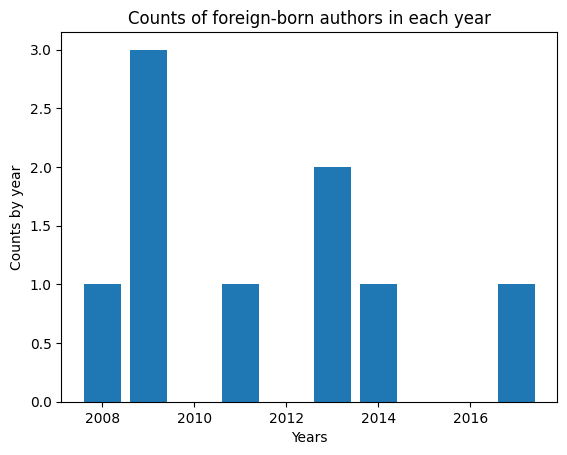

In [18]:

import matplotlib.pyplot as plt

%matplotlib inline

plt.bar(years, unknown_by_yr)
plt.title('Counts of foreign-born authors in each year')
plt.xlabel('Years')
plt.ylabel('Counts by year')
plt.show()

## 8. Raising the bar
<p>What’s more exciting than a bar chart is a grouped bar chart. This type of chart is good for displaying <em>changes</em> over time while also <em>comparing</em> two or more groups. Let’s use a grouped bar chart to look at the distribution of male and female authors over time.</p>

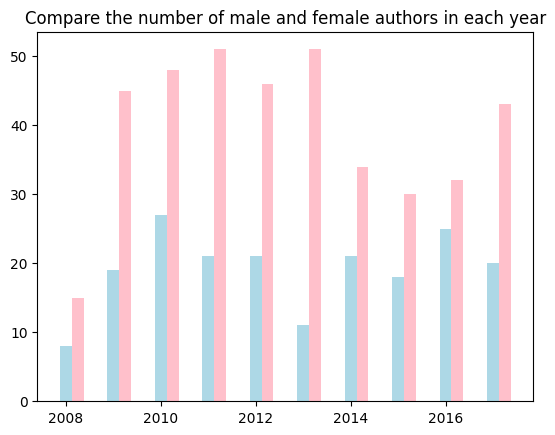

In [19]:
years_shifted = [year + 0.25 for year in years]


plt.bar(years, males_by_yr, width=0.25, color='lightblue')
plt.bar(years_shifted, females_by_yr, width=0.25, color='pink')
plt.title('Compare the number of male and female authors in each year')
plt.show()
# Plotting females_by_yr by years_shifted
# ... YOUR CODE FOR TASK 8 ...

# [OPTIONAL] - Adding relevant, Axes labels and Chart Title
# ... YOUR CODE FOR TASK 8 ...